# Simple classification with DNN
 An example of classification using a dense neural network for the famous MNIST dataset


## Objectives :

- Recognizing handwritten numbers
- Understanding the principle of a classifier DNN network 
- Implementation with Keras

The MNIST dataset (Modified National Institute of Standards and Technology) is a must for Deep Learning.It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.

# Step 1 - Init python stuff

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys, os
from importlib import reload

from sklearn.metrics import confusion_matrix
import seaborn as sns 

In [3]:
fit_verbosity = 1

# Step 2 - Retrieve data

MNIST is one of the moste famous historic dataset.
Include in Keras datasets

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test :  (10000, 28, 28)
y_test :  (10000,)


# Step 3 - Preparing the data

In [5]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax= x_train.max()
x_train = x_train / xmax
x_test = x_test / xmax

print('After normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization : Min=0.0, max=1.0


## Have a look

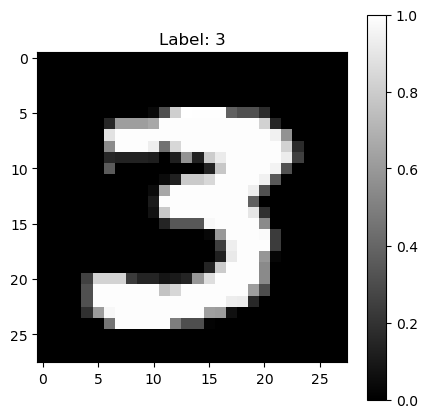

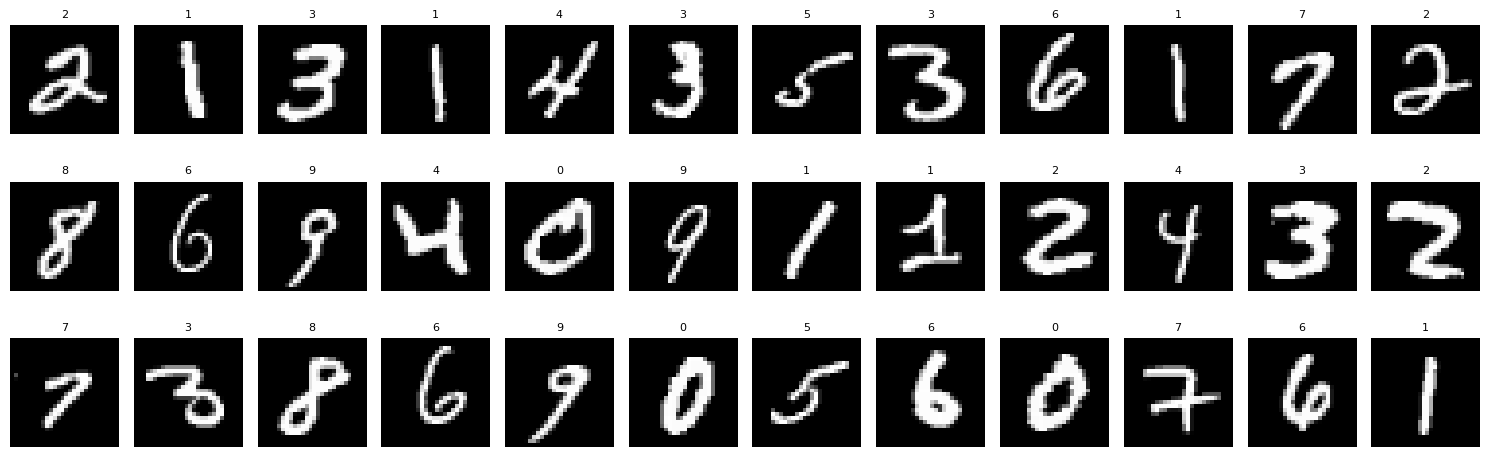

In [7]:
plt.figure(figsize=(5, 5))
plt.imshow(x_train[27], cmap='gray')
plt.colorbar()
plt.title(f'Label: {y_train[27]}')
plt.show()

rows = 3
cols = 12

plt.figure(figsize=(15, 5)) 

for i, idx in enumerate(range(5, 41), start=1):
    plt.subplot(rows, cols, i) #
    plt.imshow(x_train[idx], cmap='gray') 
    plt.title(y_train[idx], fontsize=8) 
    plt.axis('off') 

plt.tight_layout() 
plt.show()



# Step 4 - Create model

In [8]:
hidden1 = 100
hidden2 = 100

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(hidden1, activation='relu'),
    keras.layers.Dense(hidden2, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Step 5 - Train the model

In [9]:
batch_size = 512
epochs = 16

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = fit_verbosity, validation_data= (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 1s 6ms/step - loss: 0.5845 - accuracy: 0.8418 - val_loss: 0.2382 - val_accuracy: 0.9316
Epoch 2/16
118/118 [==============================] - 1s 5ms/step - loss: 0.2123 - accuracy: 0.9388 - val_loss: 0.1740 - val_accuracy: 0.9495
Epoch 3/16
118/118 [==============================] - 1s 5ms/step - loss: 0.1640 - accuracy: 0.9531 - val_loss: 0.1507 - val_accuracy: 0.9542
Epoch 4/16
118/118 [==============================] - 1s 5ms/step - loss: 0.1326 - accuracy: 0.9618 - val_loss: 0.1365 - val_accuracy: 0.9577
Epoch 5/16
118/118 [==============================] - 1s 5ms/step - loss: 0.1127 - accuracy: 0.9671 - val_loss: 0.1176 - val_accuracy: 0.9649
Epoch 6/16
118/118 [==============================] - 1s 5ms/step - loss: 0.0948 - accuracy: 0.9719 - val_loss: 0.1080 - val_accuracy: 0.9667
Epoch 7/16
118/118 [==============================] - 1s 6ms/step - loss: 0.0827 - accuracy: 0.9757 - val_loss: 0.1043 - val_accuracy: 0.9684
Epoch 

# Step 6 - Evaluate

## 6.1 - Final loss and accuracy

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.07644423097372055
Test accuracy : 0.9776999950408936


## 6.2 - Plot history

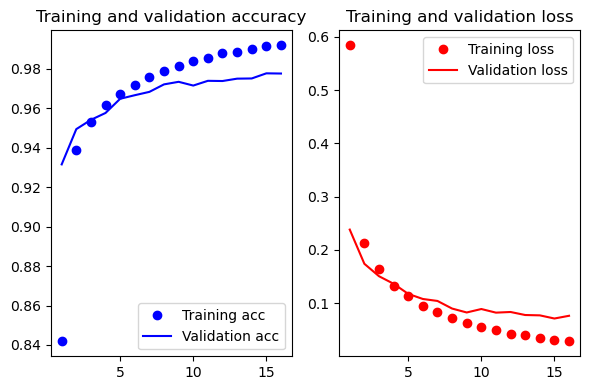

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Création de la figure pour la précision
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1) # Précision
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)  # Perte
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.tight_layout() 
plt.show()

## 6.3 - Plot results

313/313 [==============================] - 0s 1ms/step


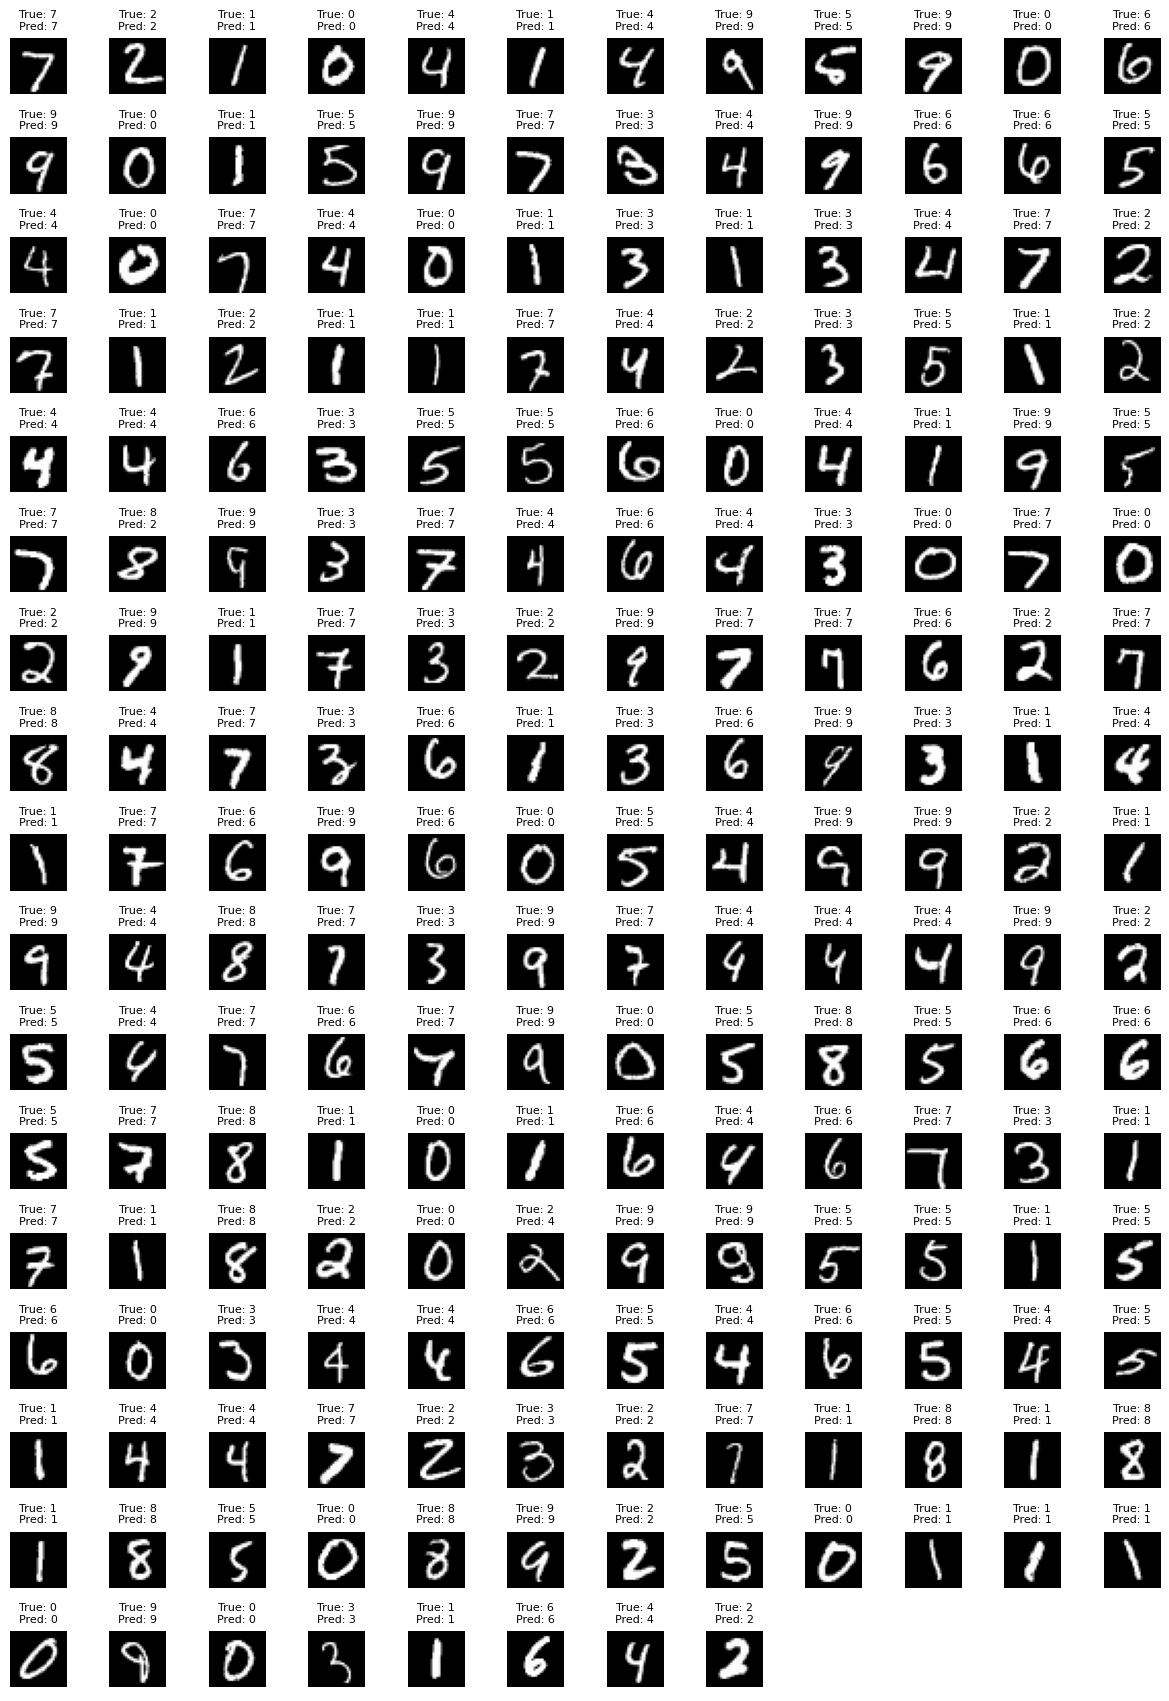

In [37]:
y_sigmoid = model.predict(x_test, verbose=fit_verbosity)
y_pred    = np.argmax(y_sigmoid, axis=-1)

# Définir le nombre d'images à afficher et le nombre de colonnes
n_images = 200
columns = 12
rows = (n_images + columns - 1) // columns  # Calculer le nombre de lignes nécessaires

# Taille de l'image dans le plot, ajustez selon vos besoins
x_size = 1
y_size = 1

# Création de la figure avec un espace spécifié entre les images
fig, axes = plt.subplots(rows, columns, figsize=(columns * x_size, rows * y_size))
fig.tight_layout(pad=0.5)

# Aplatir le tableau d'axes pour faciliter l'itération
axes = axes.flatten()

for i in range(n_images):
    # Affichage de l'image
    ax = axes[i]
    ax.imshow(x_test[i], cmap='gray')  # Ajustez cmap selon le type de vos images (par exemple 'gray' pour les images en niveaux de gris)

    # Titre de l'image avec l'étiquette réelle et prédite
    ax.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}", fontsize=8)

    # Suppression des axes pour une meilleure visibilité
    ax.axis('off')

# Masquer les axes restants s'il y en a
for i in range(n_images, len(axes)):
    axes[i].axis('off')

# Enregistrer la figure si nécessaire
plt.savefig('04-predictions.png', dpi=300)

# Afficher le plot
plt.show()



# 6.4 - Plot some errors

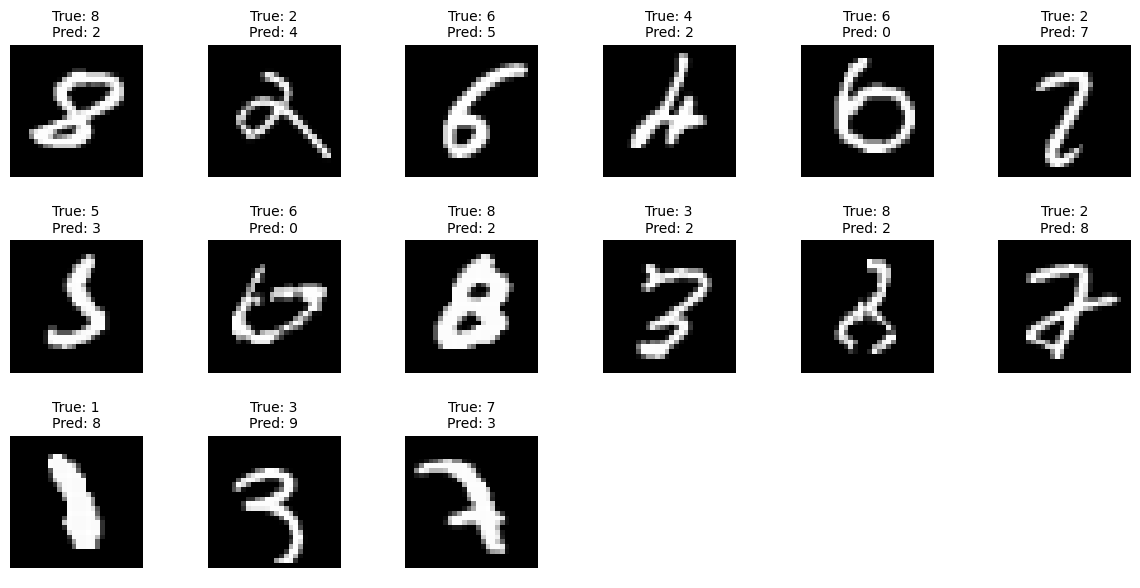

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Trouver les indices des erreurs
errors = [i for i in range(len(y_test)) if y_pred[i] != y_test[i]]
errors = errors[:min(24, len(errors))]  # Garder jusqu'à 24 erreurs

# Sélectionner un sous-ensemble pour l'affichage
errors_to_show = errors[:15]  # Afficher jusqu'à 15 erreurs

# Définir le nombre de colonnes pour l'affichage
columns = 6
rows = (len(errors_to_show) + columns - 1) // columns  # Calculer le nombre nécessaire de lignes

# Taille de l'image dans le plot, ajustez selon vos besoins
x_size = 2
y_size = 2

# Création de la figure avec un espace spécifié entre les images
fig, axes = plt.subplots(rows, columns, figsize=(columns * x_size, rows * y_size))
fig.tight_layout(pad=1.0)

# Aplatir le tableau d'axes pour une navigation facile
axes = axes.flatten()

for idx, error_idx in enumerate(errors_to_show):
    ax = axes[idx]
    ax.imshow(x_test[error_idx], cmap='gray')  # Ajuster 'cmap' pour les images en couleur si nécessaire

    # Titre avec l'étiquette réelle et prédite
    ax.set_title(f"True: {y_test[error_idx]}\nPred: {y_pred[error_idx]}", fontsize=10)

    # Supprimer les axes pour une meilleure visibilité
    ax.axis('off')

# Masquer les axes restants s'il y en a
for idx in range(len(errors_to_show), len(axes)):
    axes[idx].axis('off')

# Enregistrer la figure si nécessaire
plt.savefig('05-some-errors.png', dpi=300)

# Afficher le plot
plt.show()


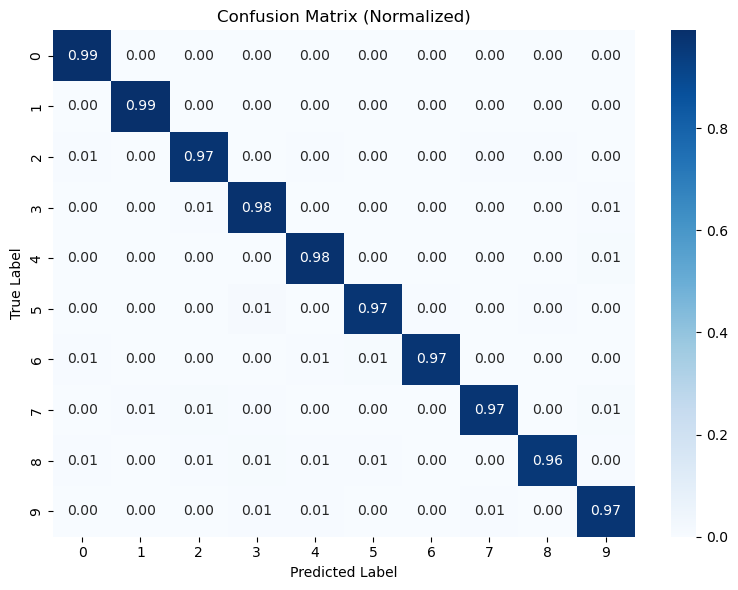

In [40]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Normalisation de la matrice de confusion
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Définition des étiquettes pour les axes
labels = range(10)  # Ajustez cette liste pour correspondre à vos étiquettes si nécessaire

# Création de la figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', cbar=True, xticklabels=labels, yticklabels=labels)

# Titre et étiquettes
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Ajustement des détails de la figure
plt.tight_layout()

# Enregistrer la figure si nécessaire
plt.savefig('06-confusion-matrix.png', dpi=300)

# Afficher la figure
plt.show()
